In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("ufc-master.csv")

In [3]:
data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs
0,Deiveson Figueiredo,Joseph Benavidez,-225,180,44.444444,180.000000,7/18/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,2.0,NaN,Red,SUB,Rear Naked Choke,1.0,4:48,288.0
1,Jack Hermansson,Kelvin Gastelum,-112,-112,89.285714,89.285714,7/18/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,Red,SUB,Heel Hook,1.0,1:18,78.0
2,Marc Diakiese,Rafael Fiziev,-167,135,59.880240,135.000000,7/18/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0
3,Ariane Lipski,Luana Carolina,-125,100,80.000000,100.000000,7/18/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,neither,SUB,Kneebar,1.0,1:28,88.0
4,Alexandre Pantoja,Askar Askarov,-210,165,47.619048,165.000000,7/18/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0


Features to be Considered

In [4]:
features = [
    'R_fighter',
    'B_fighter',
    'R_odds',
    'B_odds',
    'Winner',
    'title_bout',
    'B_current_lose_streak',
    'B_current_win_streak',
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'B_longest_win_streak',
    'B_losses',
    'B_total_rounds_fought',
    'B_total_title_bouts',
    'B_win_by_KO/TKO',
    'B_win_by_Submission',
    'B_wins',
    'B_Stance',
    'B_Height_cms',
    'B_Reach_cms',
    'B_Weight_lbs',
    'B_age',
    'R_current_lose_streak',
    'R_current_win_streak',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct',
    'R_longest_win_streak',
    'R_losses',
    'R_total_rounds_fought',
    'R_total_title_bouts',
    'R_win_by_KO/TKO',
    'R_win_by_Submission',
    'R_wins',
    'R_Stance',
    'R_Height_cms',
    'R_Reach_cms',
    'R_Weight_lbs',
    'R_age',
    'win_dif',
    'loss_dif',
    'total_round_dif',
    'ko_dif',
    'sub_dif',
    'age_dif',
    'reach_dif',
    'height_dif',
    'sig_str_dif',
    'avg_sub_att_dif',
    'avg_td_dif',
    'finish_round',
    'finish_round_time',
    'total_fight_time_secs'
]

In [5]:
data = data[features]
data.head()

,R_fighter,B_fighter,R_odds,B_odds,Winner,title_bout,B_current_lose_streak,B_current_win_streak,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,...,sub_dif,age_dif,reach_dif,height_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,finish_round,finish_round_time,total_fight_time_secs
0,Deiveson Figueiredo,Joseph Benavidez,-225,180,Red,True,1,0,3.53,0.34,...,3,3,-7.62,-2.54,0.99,-1.8,-0.31,1.0,4:48,288.0
1,Jack Hermansson,Kelvin Gastelum,-112,-112,Red,False,2,0,3.75,0.43,...,0,-4,-15.24,-10.16,-1.38,-0.6,-1.43,1.0,1:18,78.0
2,Marc Diakiese,Rafael Fiziev,-167,135,Blue,False,0,1,4.08,0.50,...,0,0,-5.08,-5.08,1.22,0.0,-1.59,3.0,5:00,900.0
3,Ariane Lipski,Luana Carolina,-125,100,Red,False,0,1,6.53,0.50,...,0,1,5.08,0.00,3.15,1.7,-0.33,1.0,1:28,88.0
4,Alexandre Pantoja,Askar Askarov,-210,165,Blue,False,0,1,3.43,0.48,...,-2,-3,0.00,2.54,-1.15,-1.3,0.90,3.0,5:00,900.0


In [37]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, plot_roc_curve, roc_curve

In [57]:
Y = label_binarize(data['Winner'],classes=['Red','Blue'])

Helper Functions

In [88]:
def analyze_model_rms(model=None,model_name=None,X=None,Y=None,title='All Features'):

    errors = []
    
    # Data Preparation
    if len(X.shape) == 1:
        X = X.to_numpy().reshape(-1,1)
    else:
        X = X.to_numpy()
    
    # Model Fitting and Predictions
    for _ in range(100):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y.reshape(-1))
        cls = model()
        cls.fit(X_train, Y_train)
        yp = cls.predict(X_test)
        errors.append(mean_squared_error(yp, Y_test))
        
    # Stats
    error = np.array(errors)
    mean = np.mean(errors)
    SD = np.std(errors)
    
    # Plot
    plt.scatter(range(100),errors)
    plt.axhline(mean, c='k',label="Mean Error: {:0.3f}, SD: {:0.3f}".format(mean, SD))
    plt.axhline(mean+2*SD,linestyle='--',c="k")
    plt.axhline(mean-2*SD,linestyle='--',c='k')
    plt.title(f"{title} RMS\n{model_name}", fontsize=20)
    plt.xlabel("Number of Samples", fontsize=16)
    plt.ylabel("Mean Squared Error", fontsize=16)
    plt.grid()
    plt.legend()
    
    plt.gcf().set_size_inches(12,8)
    plt.savefig(f'Visualizations/rms_analysis/{model_name}/{title} RMS.jpg')
    plt.show()


In [107]:
def plot_roc_curves(model,model_name,X,Y,title):
    # One Feature at a Time
    for feature in independent:
        X = data[feature].to_numpy().reshape(-1,1)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
        model = KNN()
        model.fit(X_train,Y_train)
        yprobs = model.predict_proba(X_test)
        plot_roc_curve(model,X_test,Y_test,ax=ax,name=pretty_title(feature))


    # All Features Considered Simultaneously
    X_train, X_test, Y_train, Y_test = train_test_split(data[independent].to_numpy(), Y)
    model = KNN()
    model.fit(X_train,Y_train)
    KNNScores = model.score(X_test,Y_test)
    plot_roc_curve(model,X_test, Y_test, ax=ax,name='Everything')

    # Fig Stuff
    ax.set_title(f"{title} Indicators ROC ({model_name})", fontsize='20')
    ax.set_ylabel("True Positive Rate",fontsize='16')
    ax.set_xlabel("False Positive Rate",fontsize='16')
    ax.plot([0,1],[0,1],lw=3,linestyle='--',color="black")
    fig.set_size_inches(12,12)
    fig.savefig(f'Visualizations/roc_curves/{title} Indicators ROC ({model_name}).jpg')

In [89]:
def pretty_title(feature_name):
    name = feature_name.replace("_", " ")
    name = name.split()
    words = len(name)
    title = ""
    for j, n in enumerate(name):
        if j == 0:
            title += n[0].upper()+n[1:]
        else:
            title += (" " + n[0].upper()+n[1:])
    return title

Seems I can't use LR or GNB so I'll look into exactly why that is.

In [90]:
models = [LR,KNN,GNB]
model_names = ["Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes"]

In [91]:
# models = [KNN]
# model_names = ["K Nearest Neighbors"]

In [92]:
independent = [    
    'win_dif',
    'loss_dif',
    'total_round_dif',
    'ko_dif',
    'sub_dif',
    'age_dif',
    'reach_dif',
    'height_dif',
    'sig_str_dif',
    'avg_sub_att_dif',
    'avg_td_dif'
]

# RMS Analysis

## Each Feature Considered One at a Time

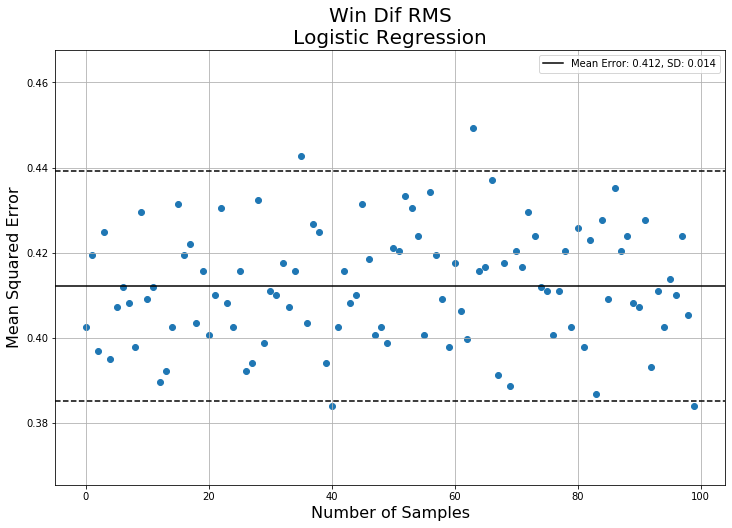

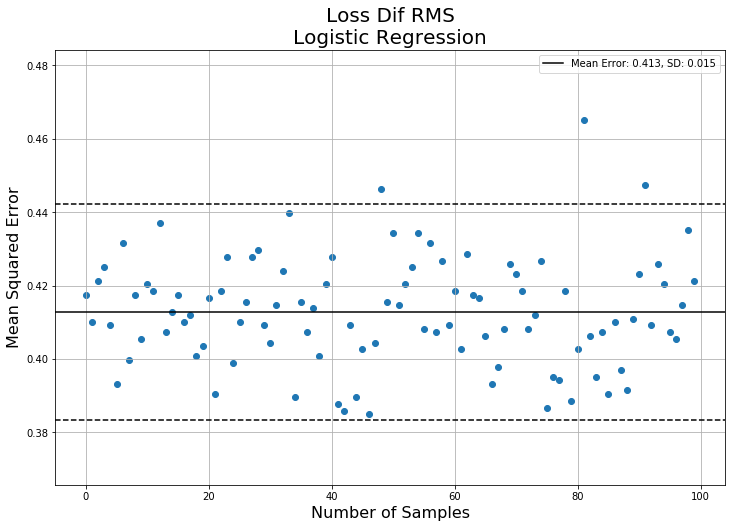

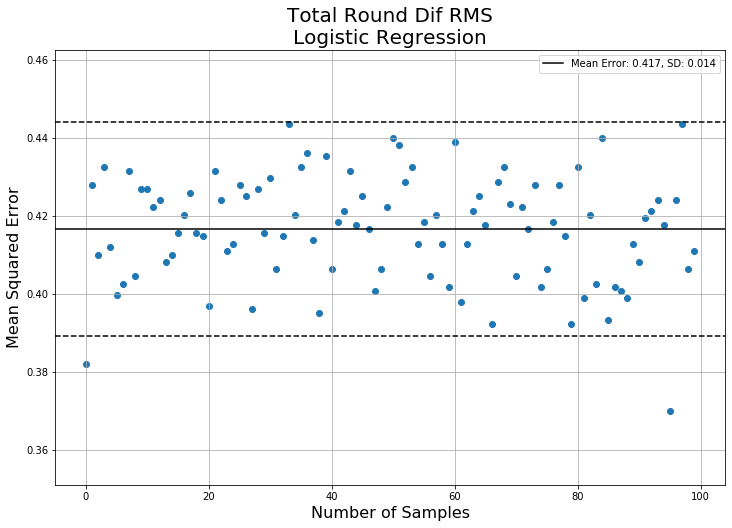

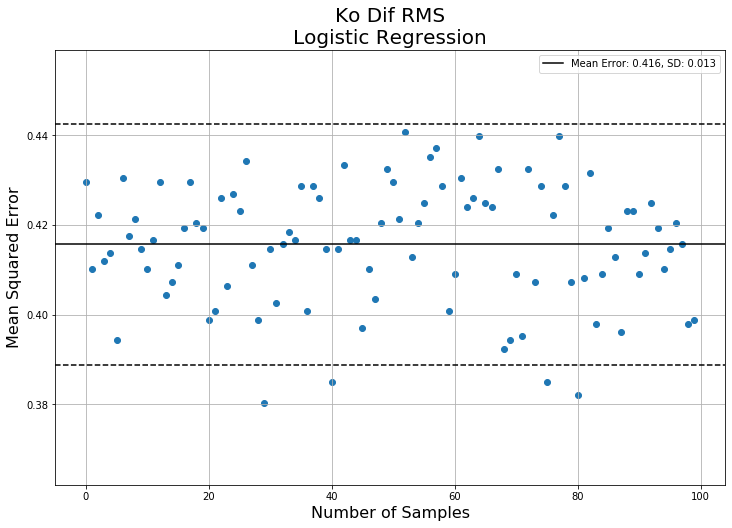

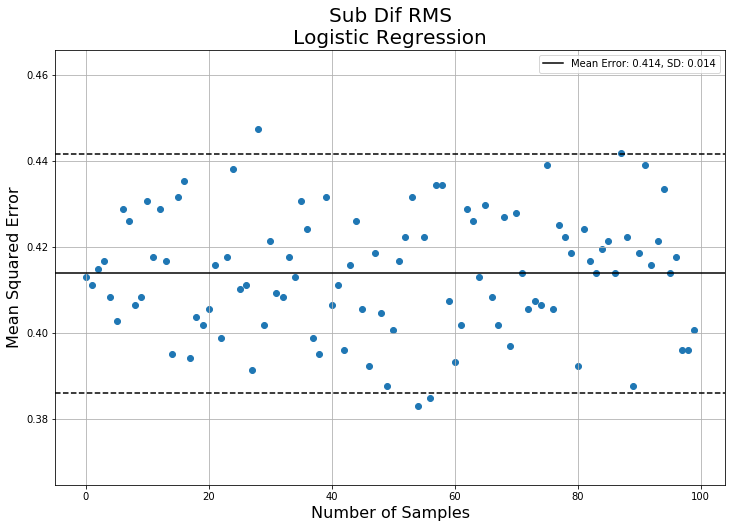

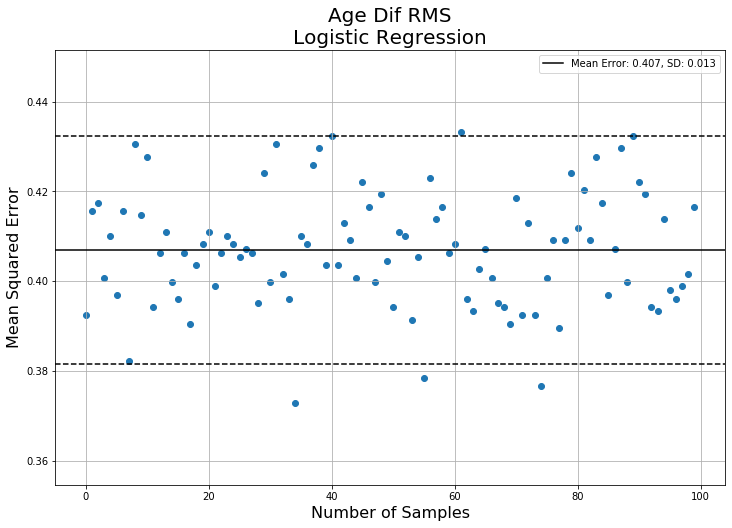

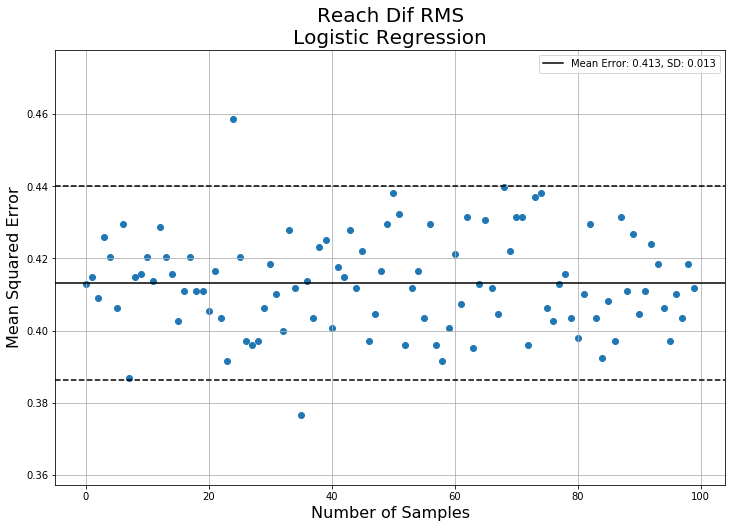

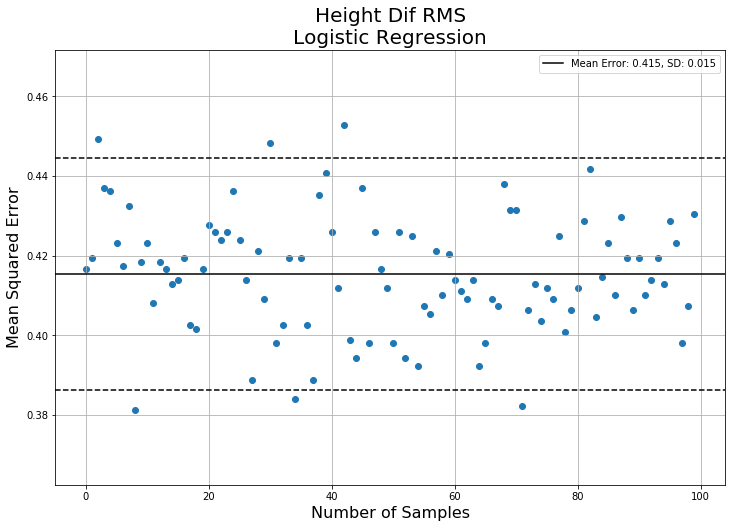

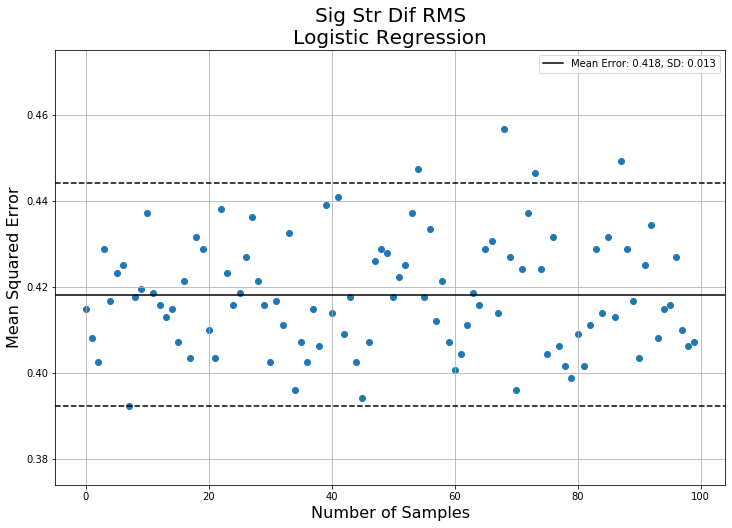

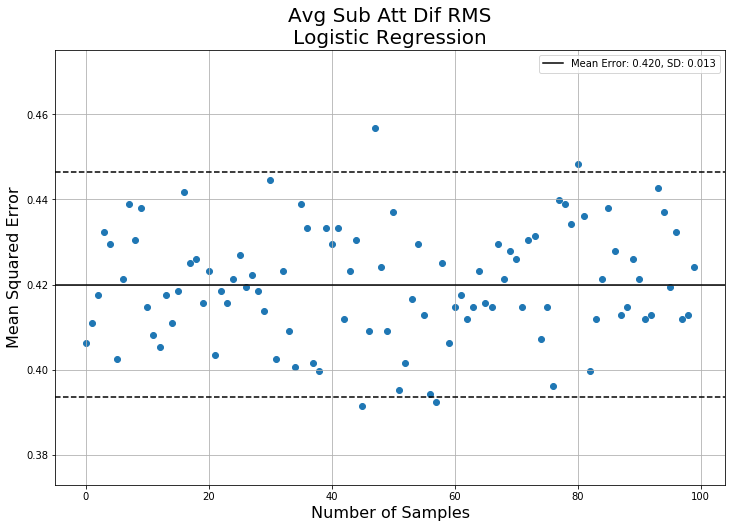

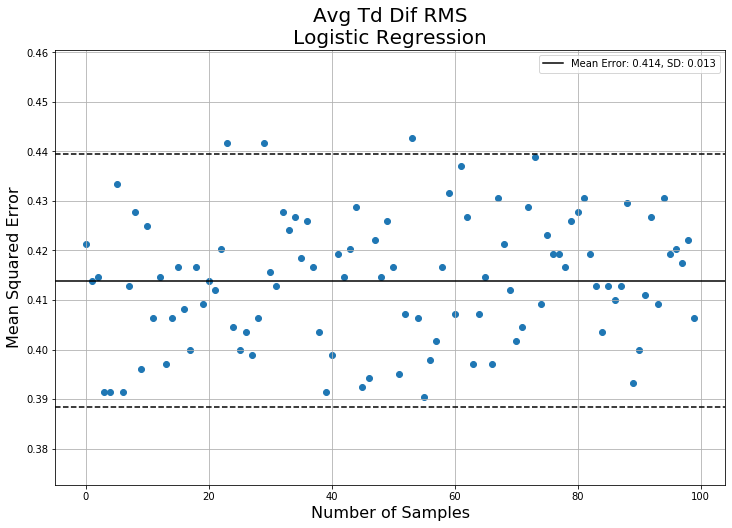

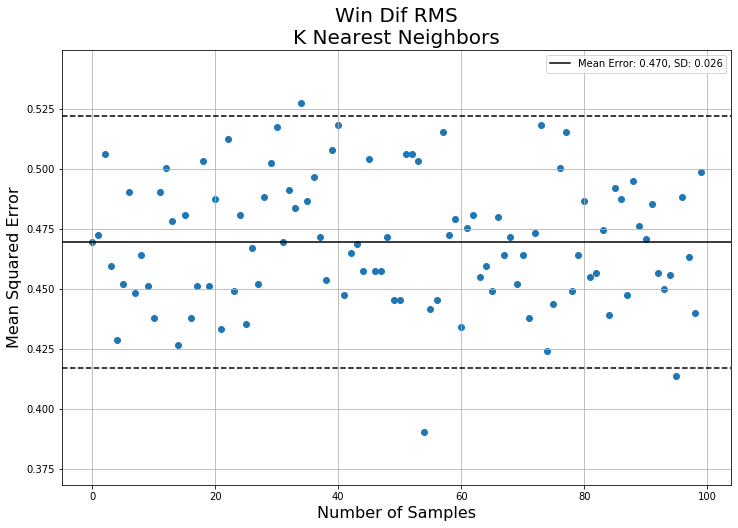

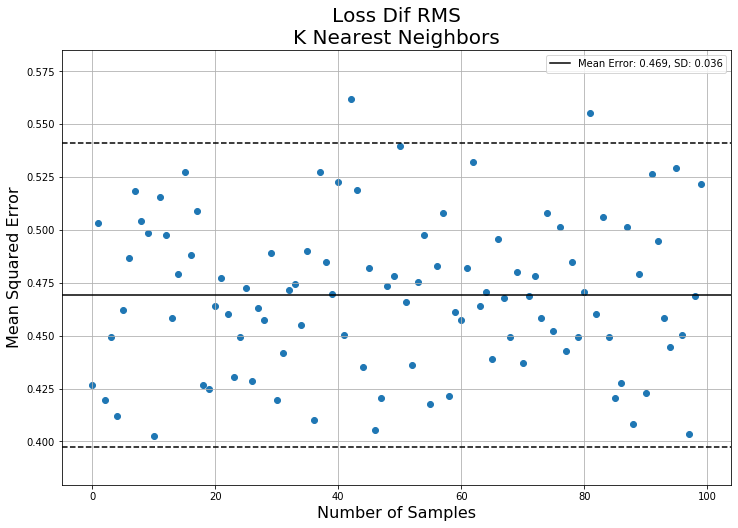

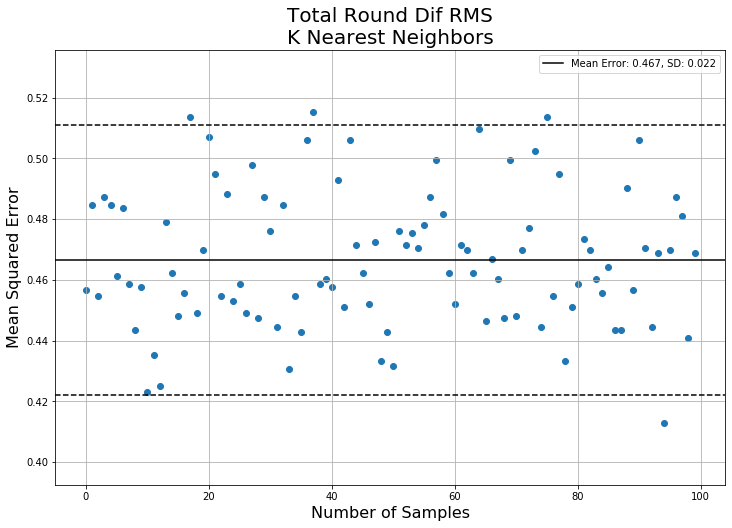

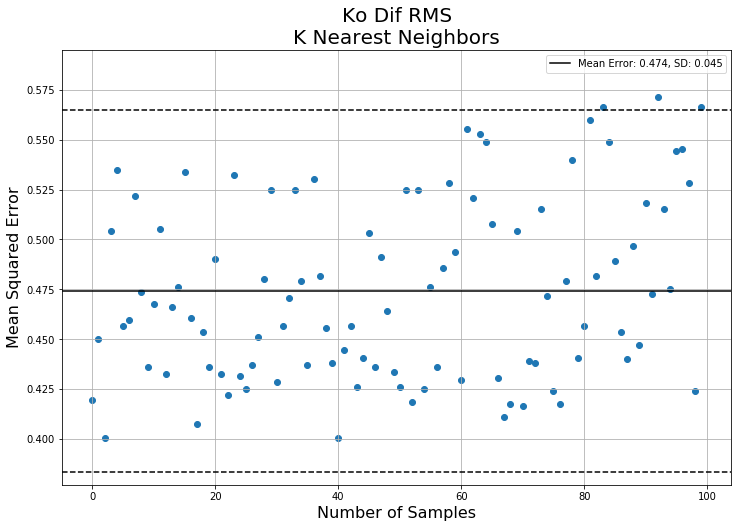

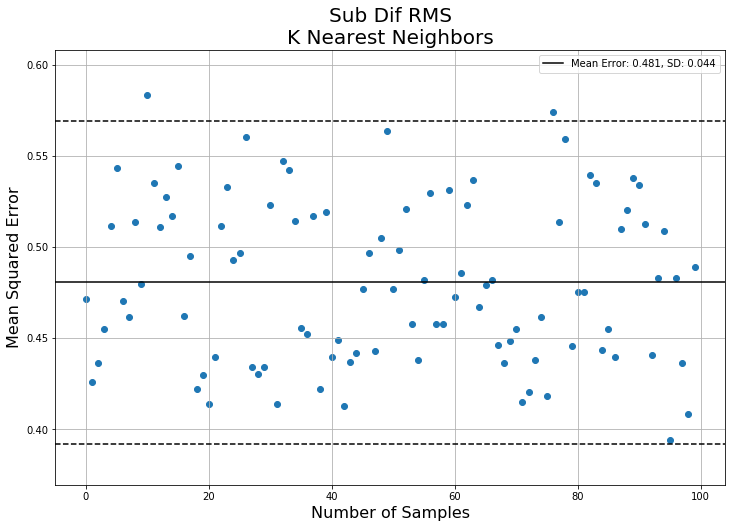

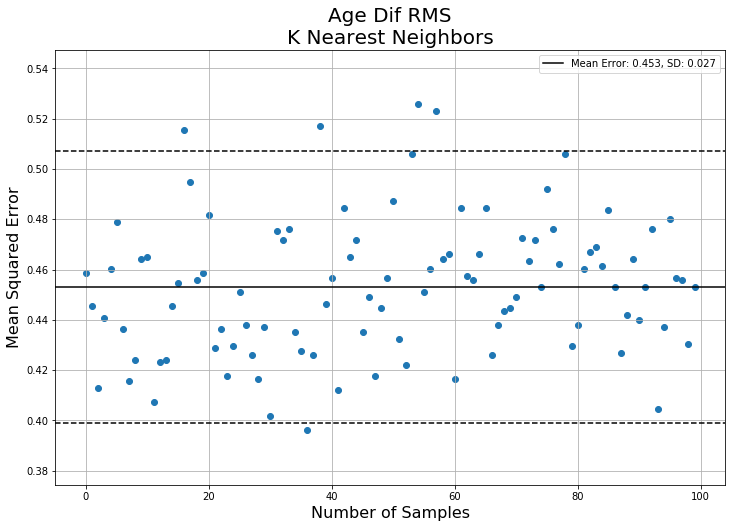

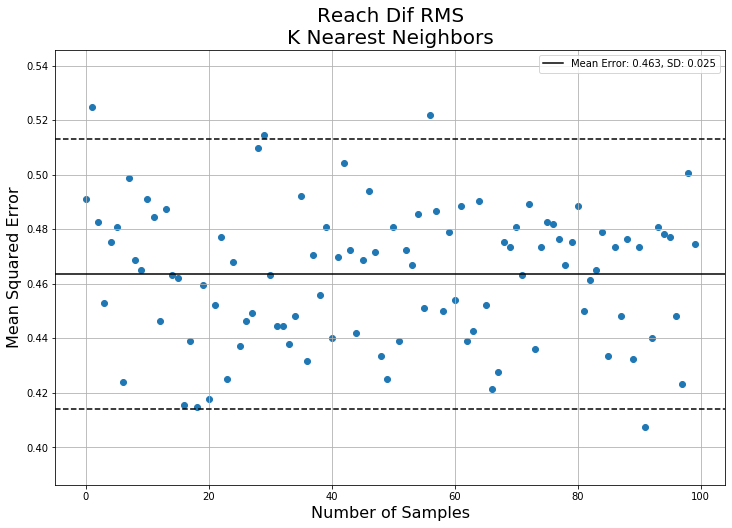

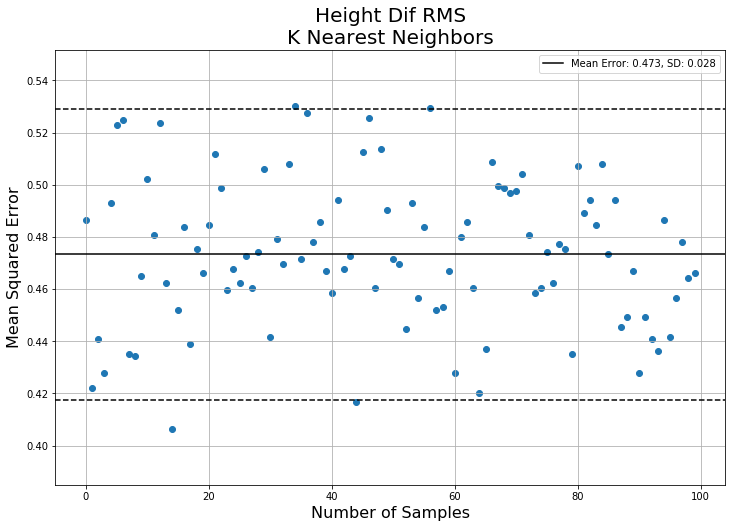

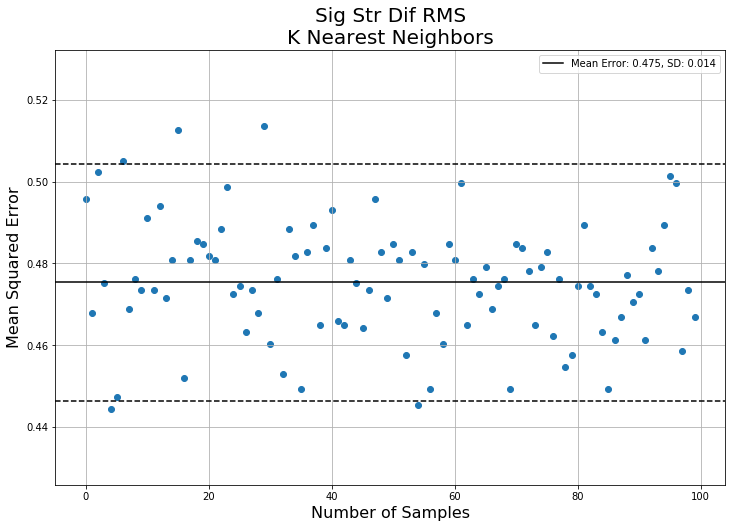

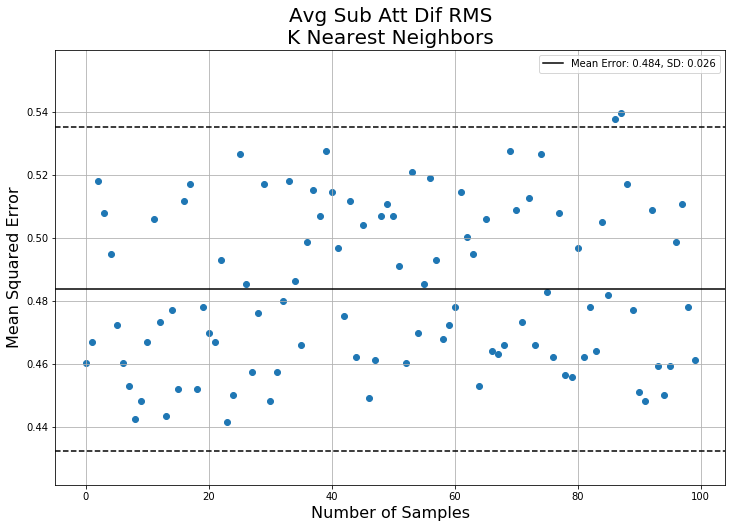

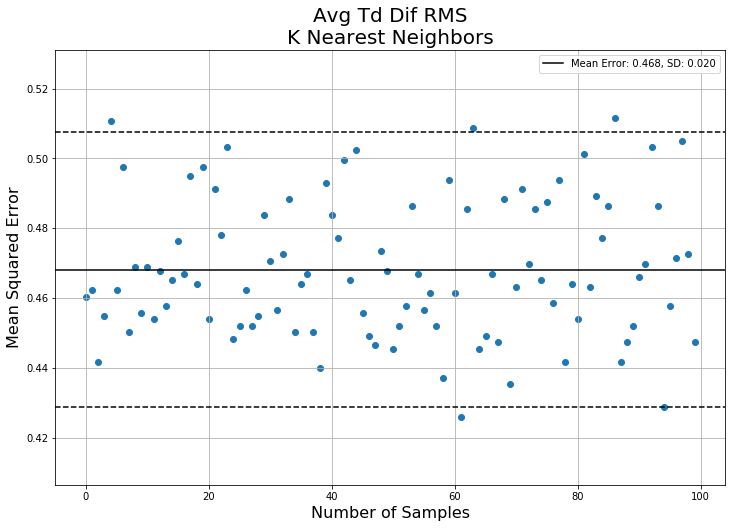

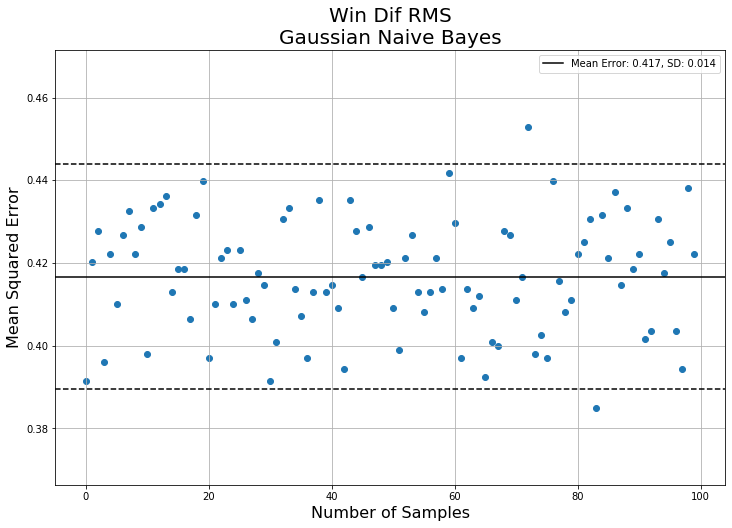

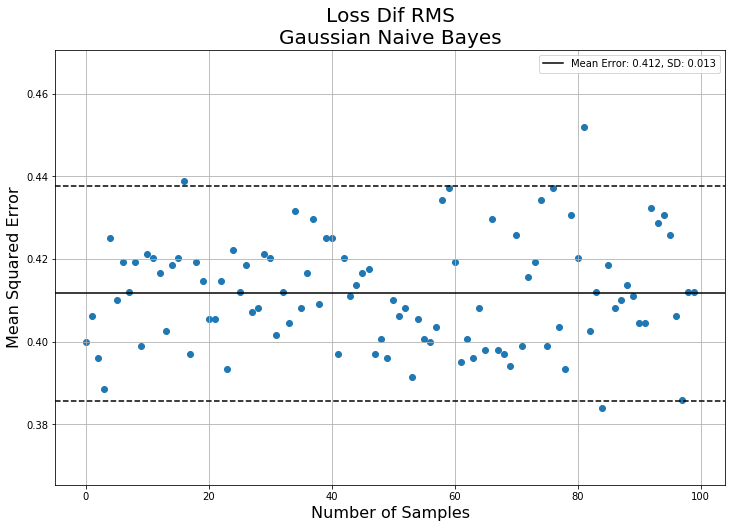

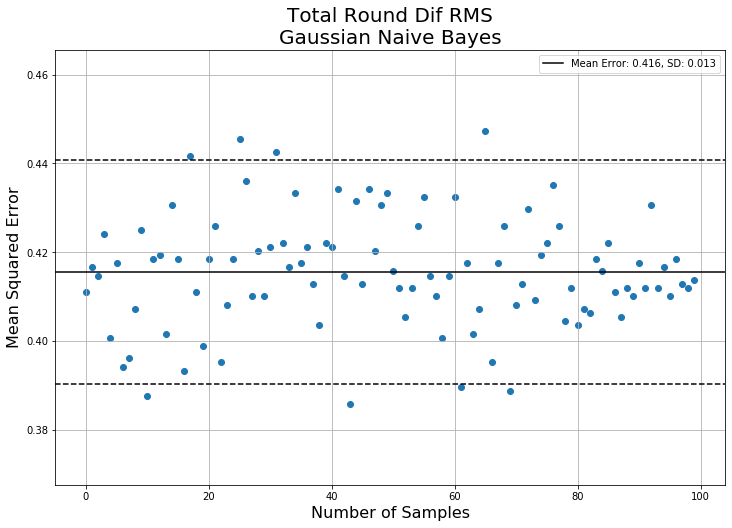

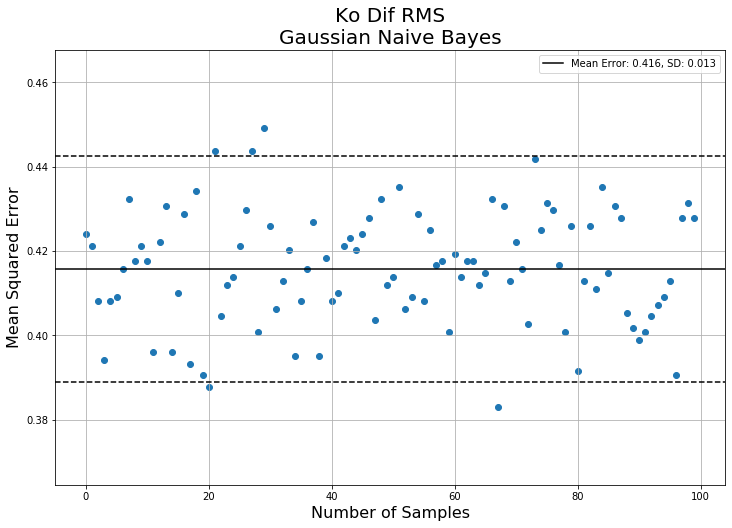

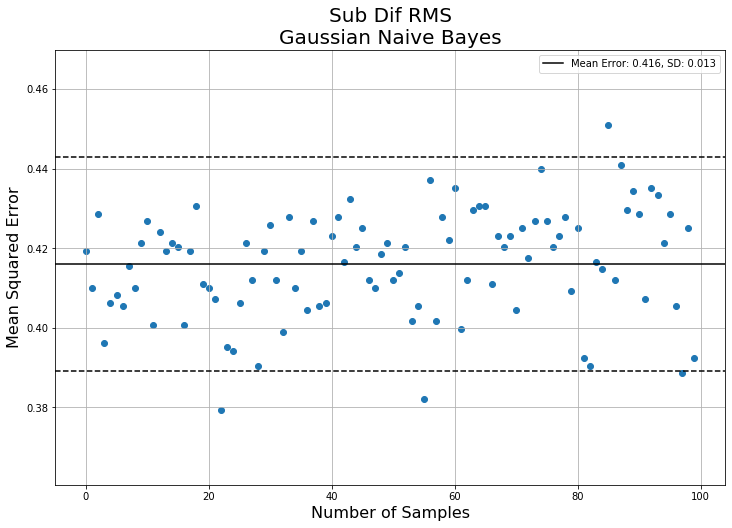

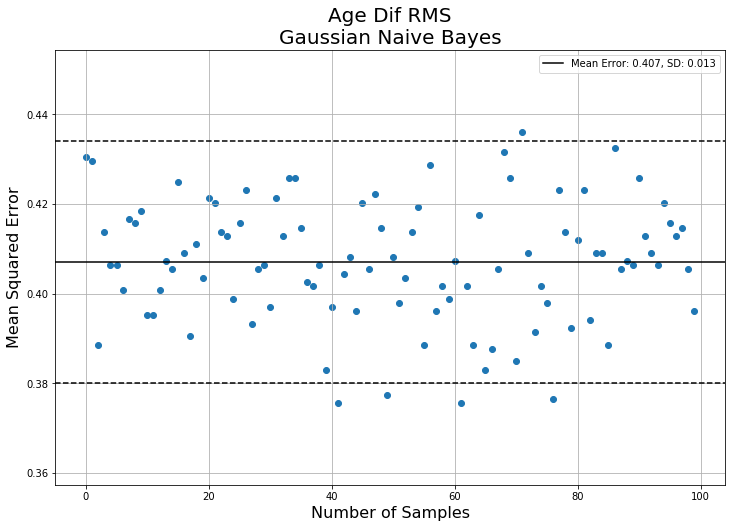

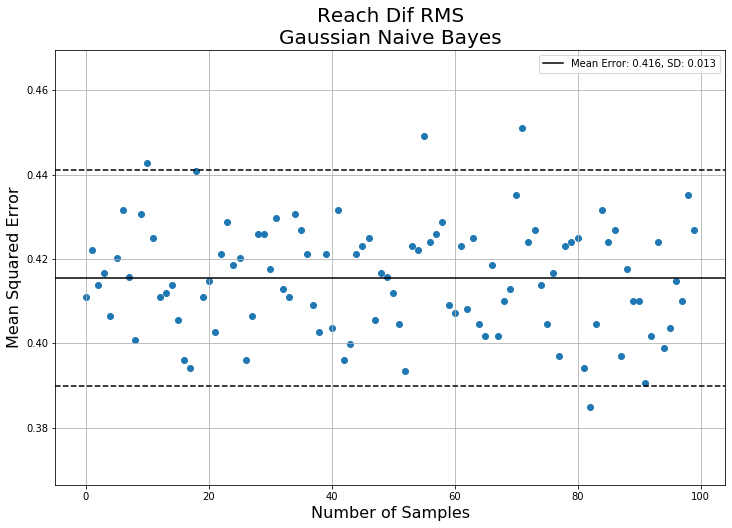

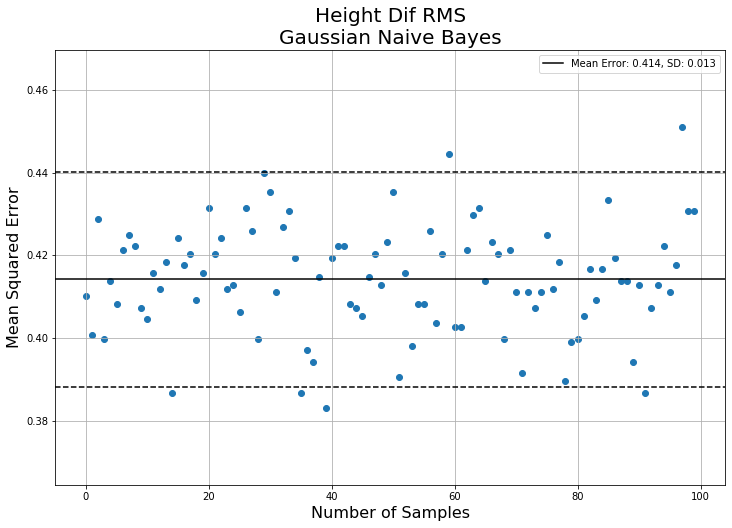

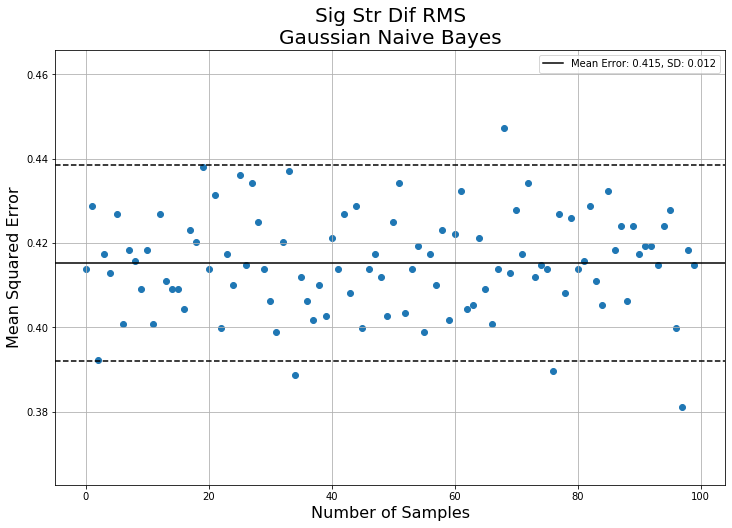

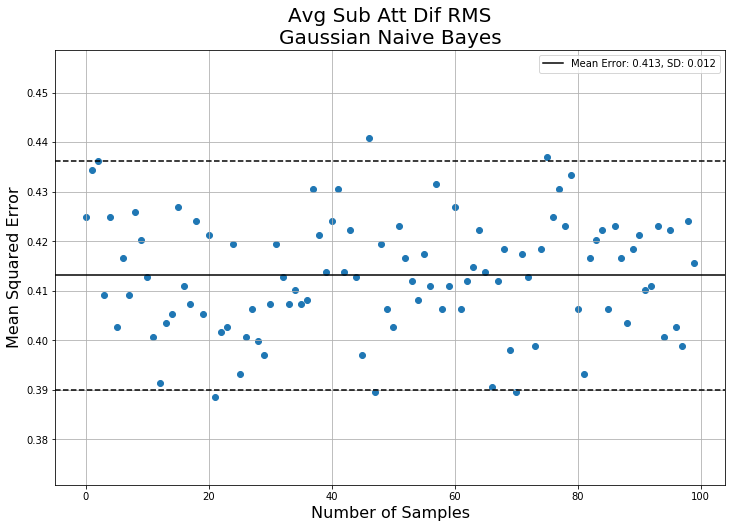

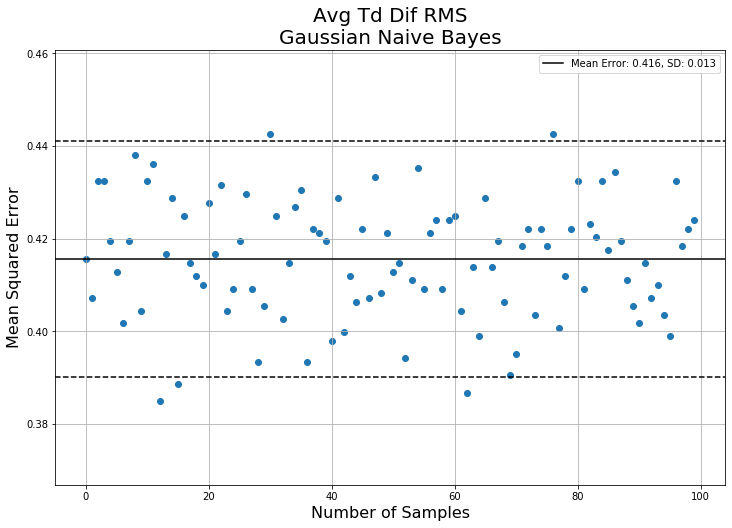

In [93]:
for i, model in enumerate(models):
    for feature in independent:
        title = pretty_title(feature)
        analyze_model_rms(model,model_names[i],data[feature],Y,title)

## All Features Considered at Once

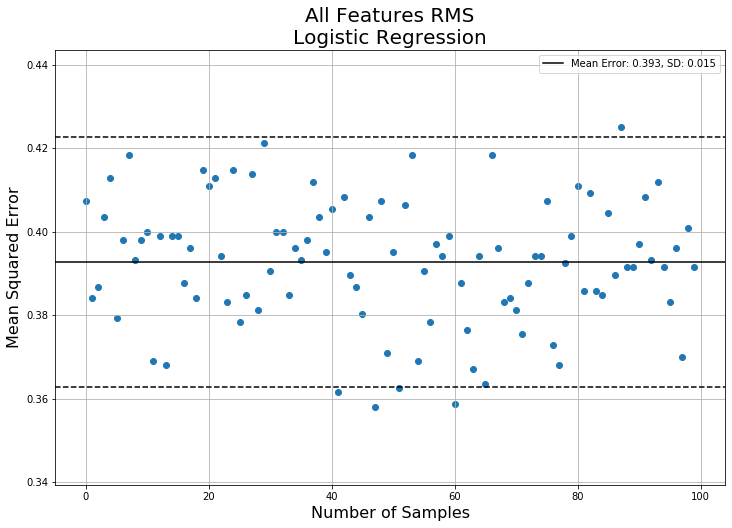

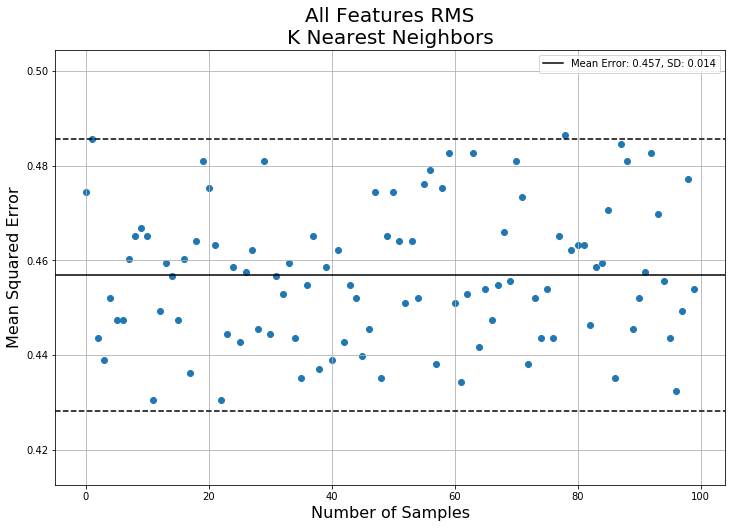

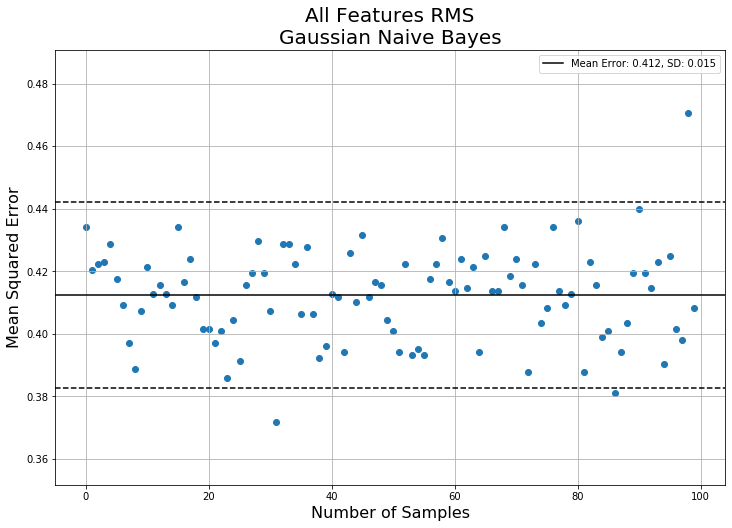

In [94]:
for i, model in enumerate(models):
    analyze_model_rms(model,model_names[i],data[independent],Y)

# ROC Analysis

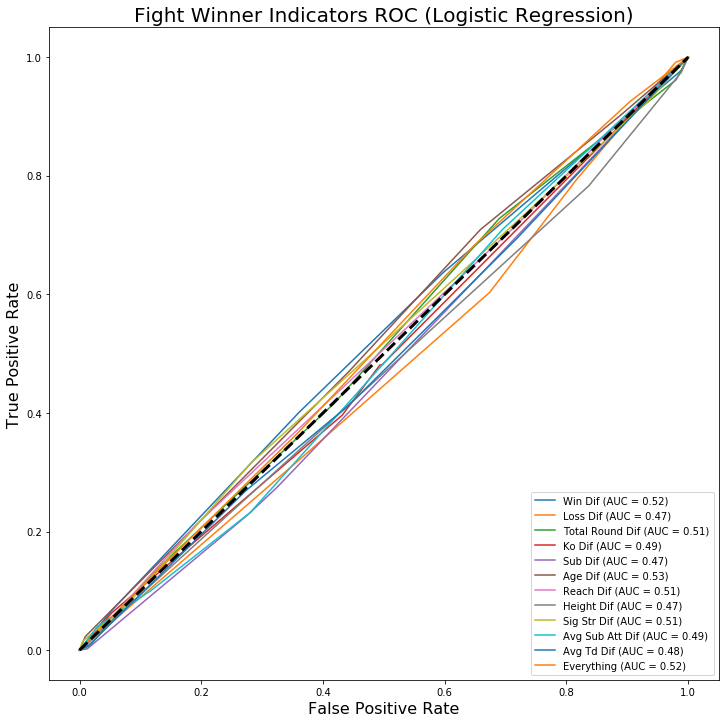

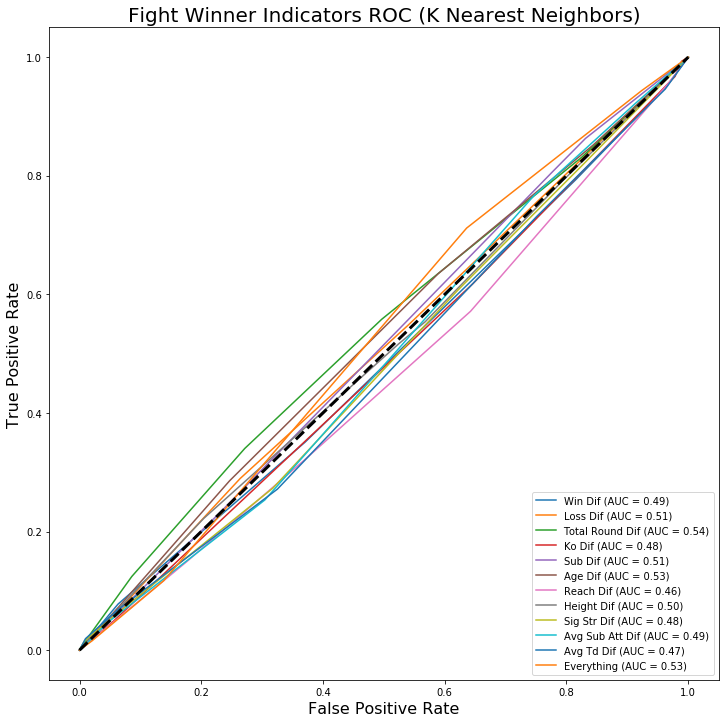

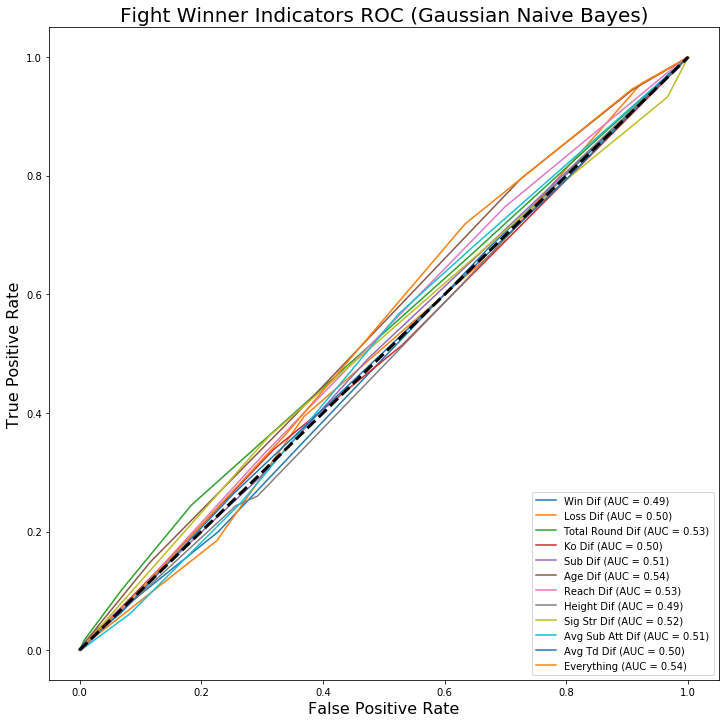

In [108]:
for i,model in enumerate(models):
    fig, ax = plt.subplots()
    plot_roc_curves(model, model_names[i],X,Y,'Fight Winner')
